<a href="https://colab.research.google.com/github/Harish03101998/Car-class/blob/main/carsclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Importing pandas to see the data in structured form
import pandas as pd

In [6]:
df = pd.read_csv('cars_class.csv')

In [7]:
df.head()

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,1,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201,0
1,2,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203,3
2,3,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
3,4,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196,1
4,5,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196,2


In [8]:
df.shape

(719, 20)

In [9]:
# dtypes is used to find the prescence of data other than numerical values
df.dtypes

ID              int64
Comp            int64
Circ            int64
D.Circ          int64
Rad.Ra          int64
Pr.Axis.Ra      int64
Max.L.Ra        int64
Scat.Ra         int64
Elong           int64
Pr.Axis.Rect    int64
Max.L.Rect      int64
Sc.Var.Maxis    int64
Sc.Var.maxis    int64
Ra.Gyr          int64
Skew.Maxis      int64
Skew.maxis      int64
Kurt.maxis      int64
Kurt.Maxis      int64
Holl.Ra         int64
Class           int64
dtype: object

In [10]:
# info is used to find the null values in data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            719 non-null    int64
 1   Comp          719 non-null    int64
 2   Circ          719 non-null    int64
 3   D.Circ        719 non-null    int64
 4   Rad.Ra        719 non-null    int64
 5   Pr.Axis.Ra    719 non-null    int64
 6   Max.L.Ra      719 non-null    int64
 7   Scat.Ra       719 non-null    int64
 8   Elong         719 non-null    int64
 9   Pr.Axis.Rect  719 non-null    int64
 10  Max.L.Rect    719 non-null    int64
 11  Sc.Var.Maxis  719 non-null    int64
 12  Sc.Var.maxis  719 non-null    int64
 13  Ra.Gyr        719 non-null    int64
 14  Skew.Maxis    719 non-null    int64
 15  Skew.maxis    719 non-null    int64
 16  Kurt.maxis    719 non-null    int64
 17  Kurt.Maxis    719 non-null    int64
 18  Holl.Ra       719 non-null    int64
 19  Class         719 non-null   

In [11]:
#since the data has no null values we can seperate data into feature matrix and target
X = df.iloc[:,0:-1] #Feature matrix
y = df.iloc[:,-1] #Target

In [12]:
y

0      0
1      3
2      3
3      1
4      2
      ..
714    0
715    2
716    3
717    2
718    0
Name: Class, Length: 719, dtype: int64

In [13]:
y.nunique()

4

In [14]:
# Now we can split the data into train and test data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
# Seaborn is used to visualize the data and to find outliers
import seaborn as sns

<AxesSubplot:>

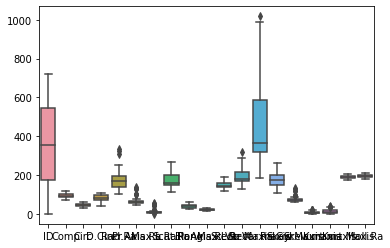

In [18]:
sns.boxplot(data = X_train)

In [19]:
#The data has huge outliers ,so Standard scaler is used to minimize outliers
from sklearn.preprocessing import StandardScaler

In [20]:
SS = StandardScaler()

In [21]:
X_train = SS.fit_transform(X_train)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

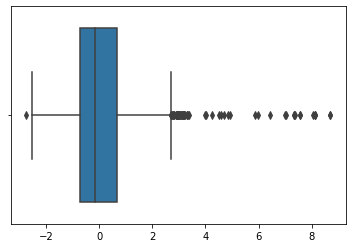

In [22]:
sns.boxplot(X_train)

In [23]:
X_test = SS.transform(X_test)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

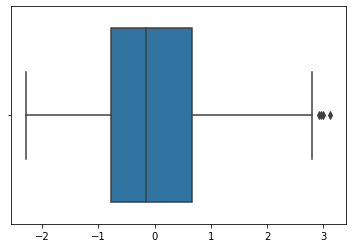

In [24]:
sns.boxplot(X_test)

In [25]:
# From here we are going to apply different machine learning techniques to check which one suits well
from sklearn.linear_model import LogisticRegression #Since this is classifiaction data I've imported Logistic Regression

In [26]:
logreg = LogisticRegression()

In [95]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
y_pred = logreg.predict(X_test)

In [145]:
logreg.score(X_test, y_test)

0.7916666666666666

In [143]:
from sklearn.metrics import f1_score

In [144]:
f1 = f1_score(y_test, y_pred, average = 'weighted')
f1

0.8008916409921559

In [146]:
from sklearn.metrics import confusion_matrix

In [31]:
cm = confusion_matrix(y_test, y_pred)

In [32]:
cm

array([[36,  1,  1,  1],
       [ 2, 19, 10,  1],
       [ 1, 11, 20,  0],
       [ 2,  0,  0, 39]])

<AxesSubplot:>

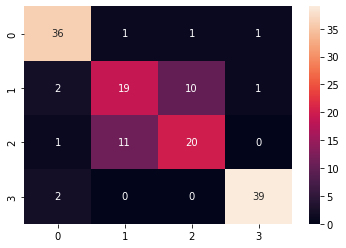

In [33]:
sns.heatmap(cm, annot = True)

In [ ]:
# In the above model we didn't get desired accuracy and f1_score, so we are moving to next model

In [156]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 0)
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.2708333333333333

In [82]:
y_pred = dtc.predict(X_test)

In [53]:
cm = confusion_matrix(y_test, y_pred)

In [54]:
cm

array([[31,  4,  1,  3],
       [ 1, 20, 10,  1],
       [ 1, 12, 19,  0],
       [ 0,  2,  4, 35]])

<AxesSubplot:>

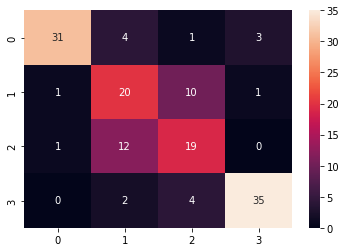

In [55]:
sns.heatmap(cm, annot = True)

In [86]:
f1 = f1_score (y_test, y_pred, average = 'weighted')
f1

0.737279791967292

In [ ]:
# In Decision Tree Classifier also we didn't get the desired accuracy and f1_score , so we are moving to final model which is Support Vector Machine

Final Model

In [126]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear') #linear kernel is used to get good accuarcy and f1 score
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.8055555555555556

In [127]:
y_pred = svc.predict (X_test)

In [131]:
f1 = f1_score (y_test, y_pred, average = 'micro')
f1

0.8055555555555556

In [134]:
cm = confusion_matrix (y_test, y_pred)

In [135]:
cm

array([[38,  0,  0,  1],
       [ 2, 20,  9,  1],
       [ 1, 13, 18,  0],
       [ 1,  0,  0, 40]])

<AxesSubplot:>

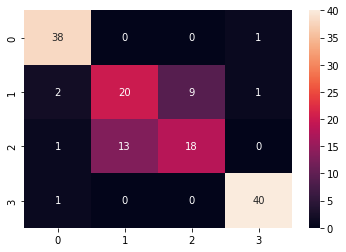

In [136]:
sns.heatmap(cm, annot = True)

In [138]:
from sklearn.metrics import ConfusionMatrixDisplay

In [157]:
display = ConfusionMatrixDisplay (confusion_matrix = cm)


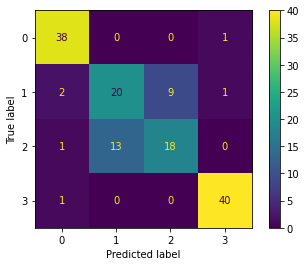

In [158]:
display.plot()

In [ ]:
# In the above model we got descent accuracy and f1_score 